In [4592]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

In [4010]:
data = pd.read_csv('/Users/nadianesib/Desktop/Bati_Bank_finance_Institute_-credit_score_analysis-edit/data/data.csv')

# overview of the data(task-2)

In [4256]:
#Understand the structure of the dataset, including the number of rows, columns, and data types.

In [4258]:
data

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,...,TransactionStartTime,PricingStrategy,FraudResult,Transaction_Hour,Transaction_Day,Transaction_Month,Transaction_Year,Transaction_Day_of_Week,Is_Weekend,Transaction_Quarter
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,...,2018-11-15 02:18:49+00:00,2,0,2,15,11,2018,3,0,4
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,...,2018-11-15 02:19:08+00:00,2,0,2,15,11,2018,3,0,4
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,...,2018-11-15 02:44:21+00:00,2,0,2,15,11,2018,3,0,4
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,...,2018-11-15 03:32:55+00:00,2,0,3,15,11,2018,3,0,4
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,...,2018-11-15 03:34:21+00:00,2,0,3,15,11,2018,3,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95657,TransactionId_89881,BatchId_96668,AccountId_4841,SubscriptionId_3829,CustomerId_3078,UGX,256,ProviderId_4,ProductId_6,financial_services,...,2019-02-13 09:54:09+00:00,2,0,9,13,2,2019,2,0,1
95658,TransactionId_91597,BatchId_3503,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,256,ProviderId_6,ProductId_10,airtime,...,2019-02-13 09:54:25+00:00,2,0,9,13,2,2019,2,0,1
95659,TransactionId_82501,BatchId_118602,AccountId_4841,SubscriptionId_3829,CustomerId_3874,UGX,256,ProviderId_4,ProductId_6,financial_services,...,2019-02-13 09:54:35+00:00,2,0,9,13,2,2019,2,0,1
95660,TransactionId_136354,BatchId_70924,AccountId_1346,SubscriptionId_652,CustomerId_1709,UGX,256,ProviderId_6,ProductId_19,tv,...,2019-02-13 10:01:10+00:00,2,0,10,13,2,2019,2,0,1


In [4017]:
data.head() #shows the general structure of the dataset.

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [4019]:
data.columns #number columns of the dataset

Index(['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId',
       'CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId',
       'ProductCategory', 'ChannelId', 'Amount', 'Value',
       'TransactionStartTime', 'PricingStrategy', 'FraudResult'],
      dtype='object')

In [4021]:
data.dtypes

TransactionId            object
BatchId                  object
AccountId                object
SubscriptionId           object
CustomerId               object
CurrencyCode             object
CountryCode               int64
ProviderId               object
ProductId                object
ProductCategory          object
ChannelId                object
Amount                  float64
Value                     int64
TransactionStartTime     object
PricingStrategy           int64
FraudResult               int64
dtype: object

In [4023]:
data.shape

(95662, 16)

# Summary statistics

In [4026]:
#Understand the central tendency, dispersion, and shape of the dataset’s distribution.

In [4028]:
data.describe()

,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000


In [4030]:
summary_stats = data.describe(include='all')  # Include all data types
summary_stats

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
count,95662,95662,95662,95662,95662,95662,95662.0,95662,95662,95662,95662,9.566200e+04,9.566200e+04,95662,95662.000000,95662.000000
unique,95662,94809,3633,3627,3742,1,NaN,6,23,9,4,NaN,NaN,94556,NaN,NaN
top,TransactionId_76871,BatchId_67019,AccountId_4841,SubscriptionId_3829,CustomerId_7343,UGX,NaN,ProviderId_4,ProductId_6,financial_services,ChannelId_3,NaN,NaN,2018-12-24T16:30:13Z,NaN,NaN
freq,1,28,30893,32630,4091,95662,NaN,38189,32635,45405,56935,NaN,NaN,17,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,256.0,NaN,NaN,NaN,NaN,6.717846e+03,9.900584e+03,NaN,2.255974,0.002018
std,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,1.233068e+05,1.231221e+05,NaN,0.732924,0.044872
min,NaN,NaN,NaN,NaN,NaN,NaN,256.0,NaN,NaN,NaN,NaN,-1.000000e+06,2.000000e+00,NaN,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,256.0,NaN,NaN,NaN,NaN,-5.000000e+01,2.750000e+02,NaN,2.000000,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,256.0,NaN,NaN,NaN,NaN,1.000000e+03,1.000000e+03,NaN,2.000000,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,256.0,NaN,NaN,NaN,NaN,2.800000e+03,5.000000e+03,NaN,2.000000,0.000000


In [4031]:
# Select numeric columns to see skewness and kurtosis
numeric_data = data.select_dtypes(include=['float64', 'int64'])

In [4034]:
skewness = numeric_data.skew()
kurtosis = numeric_data.kurtosis()

In [4036]:
skewness

CountryCode         0.000000
Amount             51.098490
Value              51.291086
PricingStrategy     1.659057
FraudResult        22.196295
dtype: float64

In [4038]:
kurtosis

CountryCode           0.000000
Amount             3363.127739
Value              3378.069274
PricingStrategy       2.087534
FraudResult         490.685762
dtype: float64

# Distribution of Numerical Features

In [4041]:
#Visualize the distribution of numerical features to identify patterns, skewness, and potential outliers.

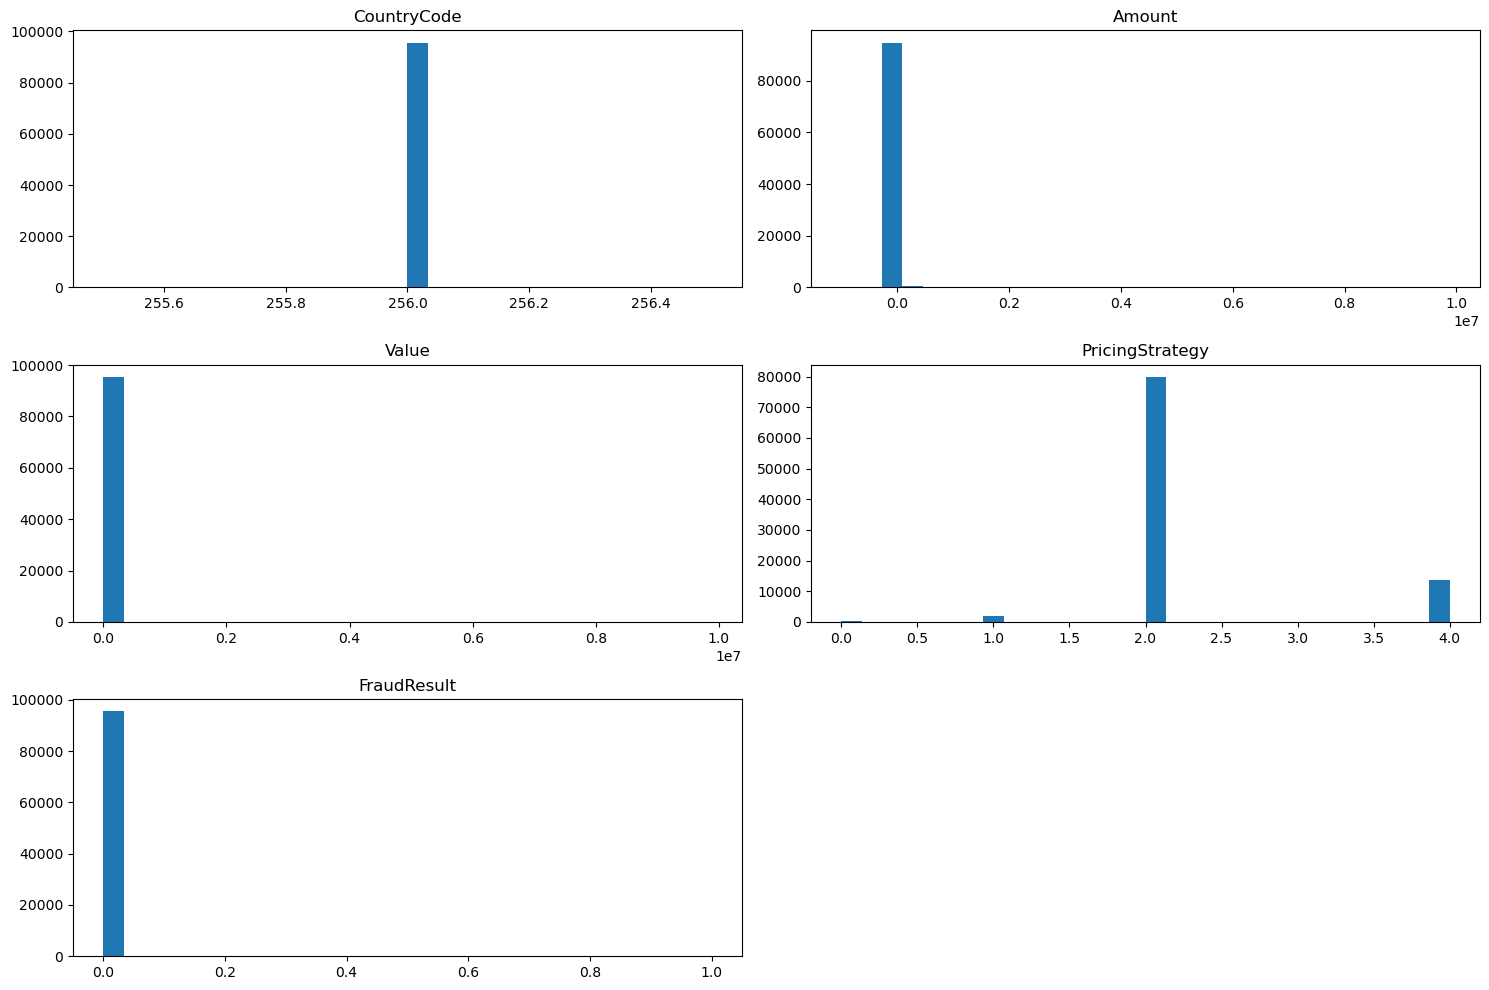

In [4043]:
#Histograms provide a visual representation of the frequency distribution of a numerical feature.
numeric_data.hist(bins=30, figsize=(15, 10), grid=False) #
plt.tight_layout()
plt.show()

In [4044]:
#Box plots display the distribution of a dataset based on a five-number summary
#(minimum, first quartile, median, third quartile, and maximum), highlighting potential outliers.

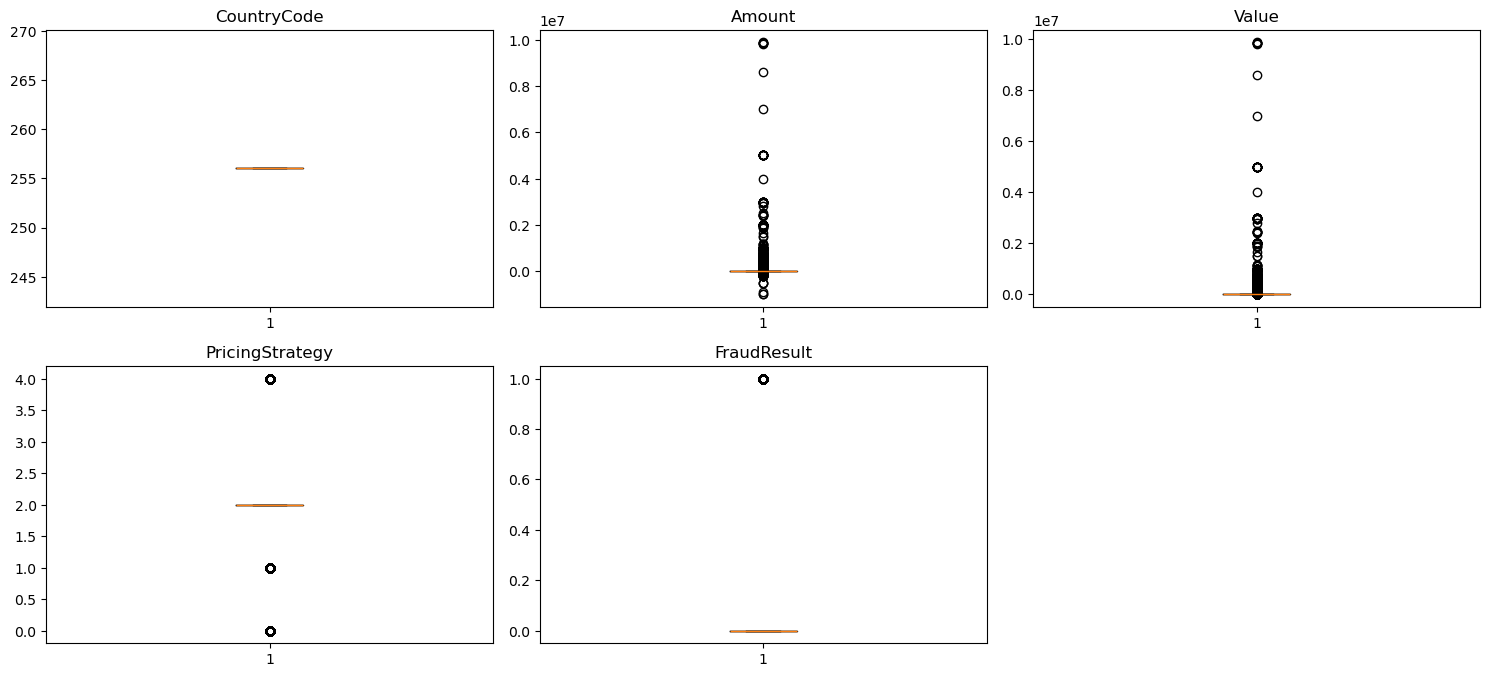

In [4047]:
# Plot box plots for each numeric feature
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_data.columns, 1):
    plt.subplot(3, 3, i)
    plt.boxplot(numeric_data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

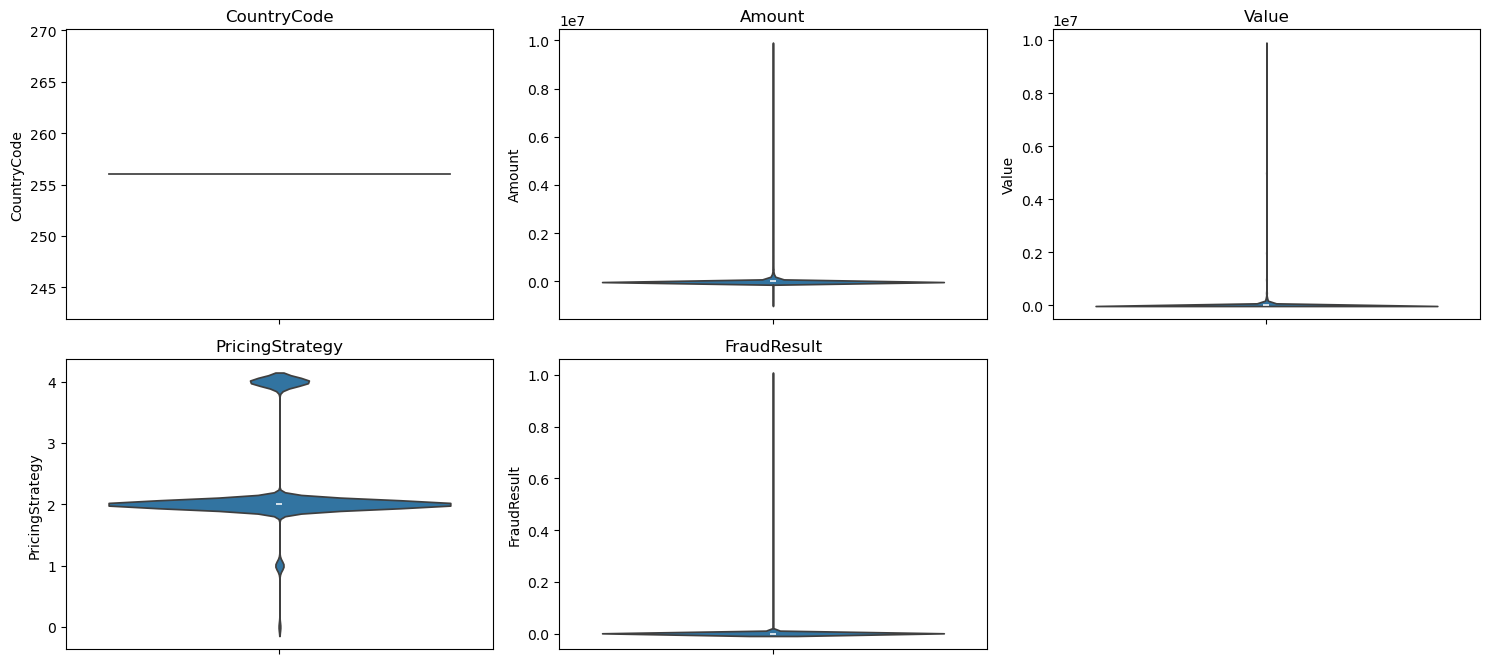

In [4048]:
# Plot violin plots for each numeric feature
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_data.columns, 1):
    plt.subplot(3, 3, i)
    sns.violinplot(data=numeric_data[col])
    plt.title(col)
plt.tight_layout()
plt.show()


# Distribution of Categorical Features

In [4051]:
#analyzing the distribution of categorical features provides insights into the frequency and variability of categories.

In [4052]:
#essential for understanding the frequency and variability of categories within your dataset. help identify patterns, trends, and potential issues such as class imbalance.

In [4053]:
# Select categorical columns
categorical_data = data.select_dtypes(include=['object', 'category'])

In [4054]:
# Frequency counts for each categorical feature
categorical_data

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,ProviderId,ProductId,ProductCategory,ChannelId,TransactionStartTime
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,ProviderId_6,ProductId_10,airtime,ChannelId_3,2018-11-15T02:18:49Z
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,ProviderId_4,ProductId_6,financial_services,ChannelId_2,2018-11-15T02:19:08Z
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,ProviderId_6,ProductId_1,airtime,ChannelId_3,2018-11-15T02:44:21Z
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,2018-11-15T03:32:55Z
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,ProviderId_4,ProductId_6,financial_services,ChannelId_2,2018-11-15T03:34:21Z
...,...,...,...,...,...,...,...,...,...,...,...
95657,TransactionId_89881,BatchId_96668,AccountId_4841,SubscriptionId_3829,CustomerId_3078,UGX,ProviderId_4,ProductId_6,financial_services,ChannelId_2,2019-02-13T09:54:09Z
95658,TransactionId_91597,BatchId_3503,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,ProviderId_6,ProductId_10,airtime,ChannelId_3,2019-02-13T09:54:25Z
95659,TransactionId_82501,BatchId_118602,AccountId_4841,SubscriptionId_3829,CustomerId_3874,UGX,ProviderId_4,ProductId_6,financial_services,ChannelId_2,2019-02-13T09:54:35Z
95660,TransactionId_136354,BatchId_70924,AccountId_1346,SubscriptionId_652,CustomerId_1709,UGX,ProviderId_6,ProductId_19,tv,ChannelId_3,2019-02-13T10:01:10Z


In [4060]:
# Number of categorical features
num_features = categorical_data.shape[1]  # This should be 11
print(f'Number of categorical features: {num_features}')

Number of categorical features: 11


In [4062]:
# Print categorical columns
print(f'Categorical columns: {categorical_data.columns.tolist()}')

Categorical columns: ['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId', 'CurrencyCode', 'ProviderId', 'ProductId', 'ProductCategory', 'ChannelId', 'TransactionStartTime']


# Correlation Analysis

In [4065]:
#helps in understanding the relationships between numerical features in your dataset. and quantifies the strength and direction of relationships 
#using correlation coefficients.

In [4067]:
# Calculate the correlation matrix, it uses Pearson correlation, which is appropriate for normally distributed data.
correlation_matrix = numeric_data.corr()

In [4069]:
correlation_matrix

,CountryCode,Amount,Value,PricingStrategy,FraudResult
CountryCode,NaN,NaN,NaN,NaN,NaN
Amount,NaN,1.000000,0.989692,-0.061931,0.557370
Value,NaN,0.989692,1.000000,-0.017020,0.566739
PricingStrategy,NaN,-0.061931,-0.017020,1.000000,-0.033821
FraudResult,NaN,0.557370,0.566739,-0.033821,1.000000


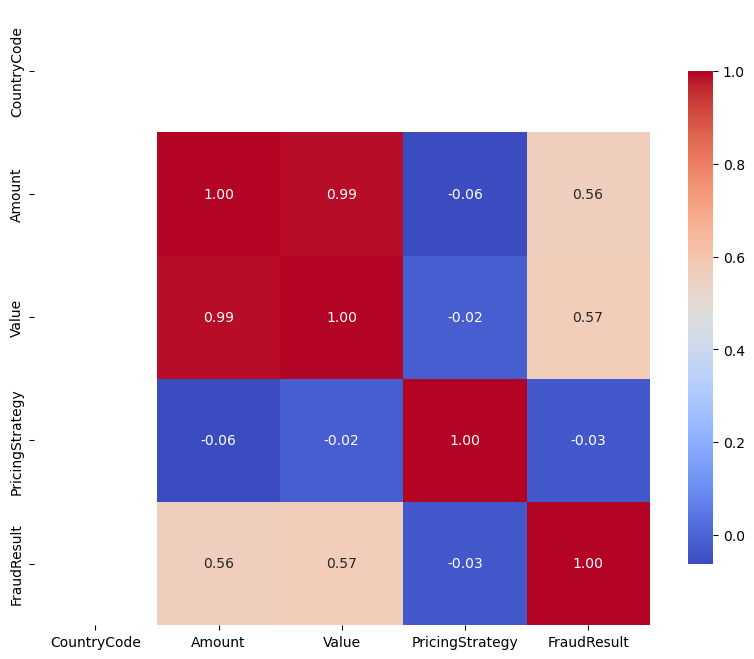

In [4071]:
# matplotlib figure
plt.figure(figsize=(10, 8))

# heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.show()

# identifying Missing Values

In [4074]:
#helps to determine missing data and decide on appropriate imputation strategies.

In [4076]:
missing_values = data.isnull().sum()  # Count missing values in each column
missing_percentage = (missing_values / len(data)) * 100  # Percentage of missing values

In [4078]:
# creating a DataFrame for better visualization
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})

In [4080]:
missing_data

,Missing Values,Percentage
TransactionId,0,0.0
BatchId,0,0.0
AccountId,0,0.0
SubscriptionId,0,0.0
CustomerId,0,0.0
CurrencyCode,0,0.0
CountryCode,0,0.0
ProviderId,0,0.0
ProductId,0,0.0
ProductCategory,0,0.0


In [4082]:
# print the missing data summary
print("Missing Data Summary:")
print(missing_data[missing_data['Missing Values'] > 0])

Missing Data Summary:
Empty DataFrame
Columns: [Missing Values, Percentage]
Index: []


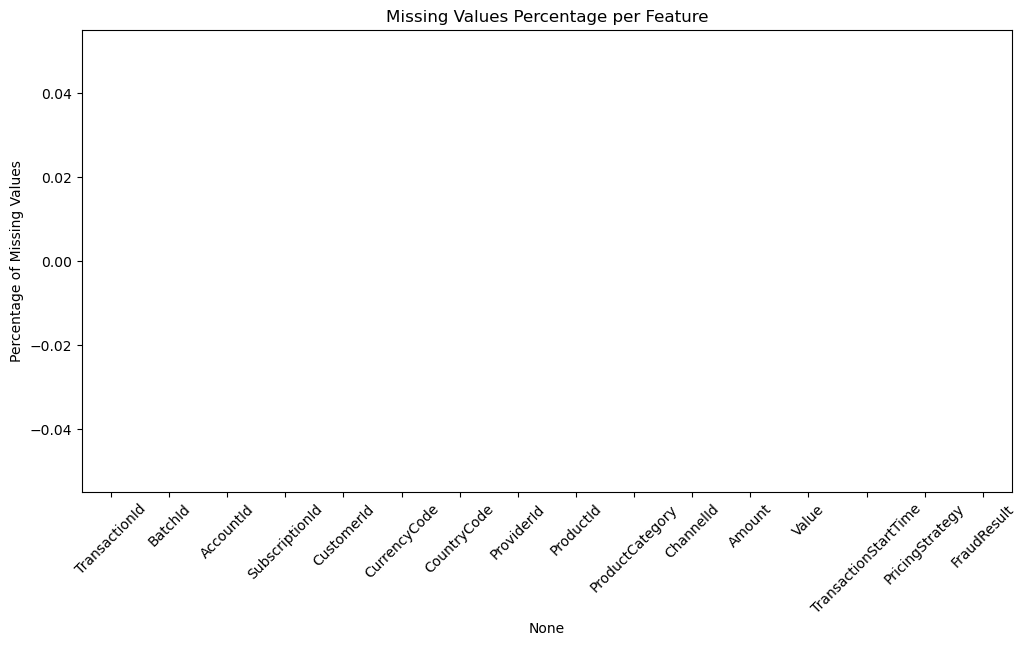

In [4084]:
#visualize missing values
plt.figure(figsize=(12, 6))
sns.barplot(x=missing_data.index, y='Percentage', data=missing_data)
plt.title('Missing Values Percentage per Feature')
plt.xticks(rotation=45)
plt.ylabel('Percentage of Missing Values')
plt.show()

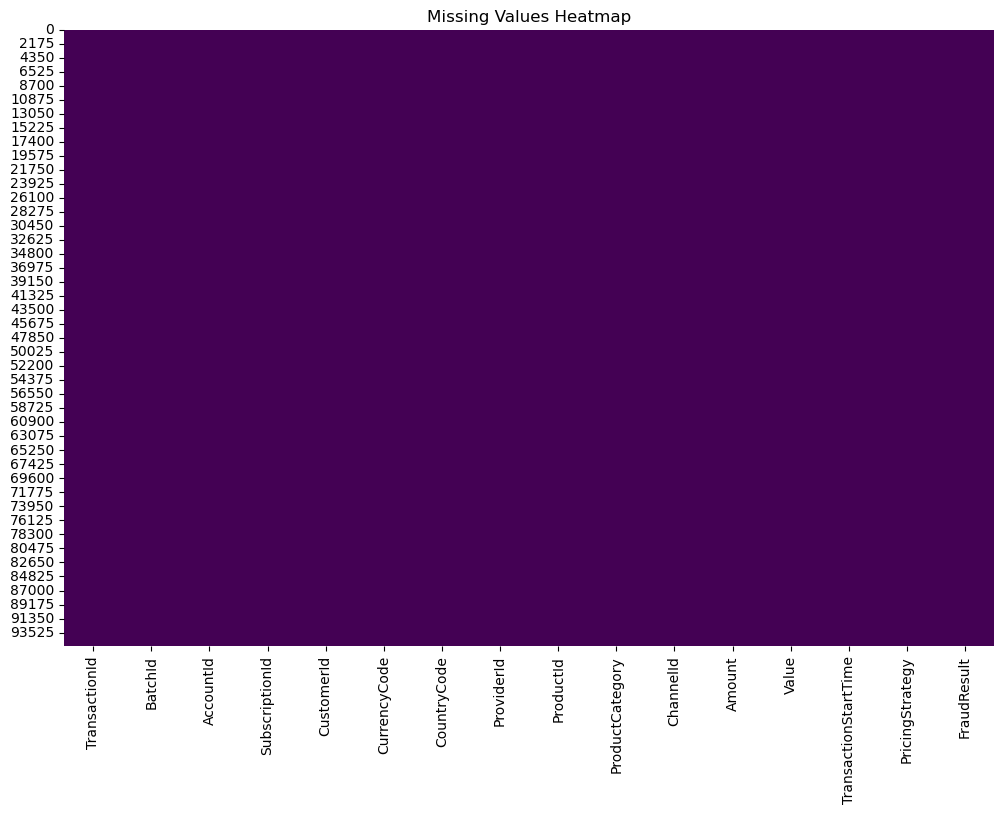

In [4086]:
#visualize missing values in a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

# Outlier Detection


In [4088]:
#use box plots to identify outliers.

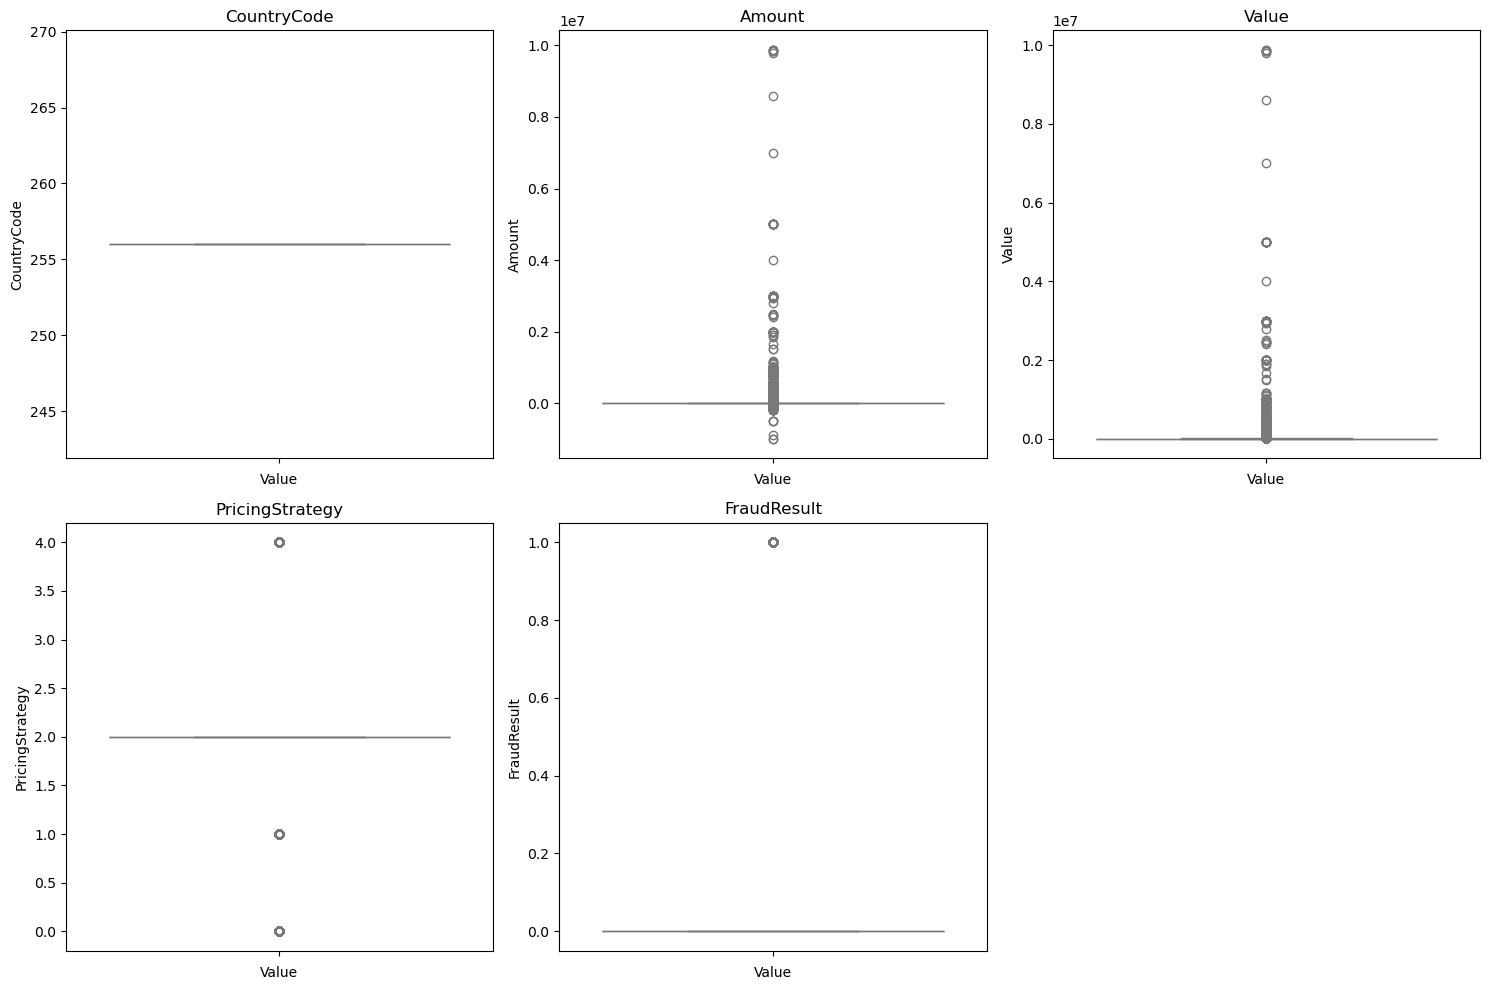

In [4089]:
#matplotlib figure
plt.figure(figsize=(15, 10))

# Create box plots for each numerical feature
for i, col in enumerate(numeric_data.columns):
    plt.subplot((len(numeric_data.columns) + 2) // 3, 3, i + 1)  # Adjust grid size
    sns.boxplot(data[col], color='lightblue')
    plt.title(col)  # Set title as the feature name
    plt.xlabel('Value')  # Label for x-axis

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

# feature engineering(task-2)

In [4093]:
#create Aggregate Features

In [4094]:
# group by 'CustomerId'
aggregated_data = data.groupby('CustomerId').agg(
    Total_Transaction_Amount=('Amount', 'sum'),        # Sum of all transaction amounts for each customer.
    Average_Transaction_Amount=('Amount', 'mean'),     # Average transaction amount per customer.
    Transaction_Count=('Amount', 'count'),             # Number of transactions per customer.
    Std_Deviation_Transaction_Amount=('Amount', 'std'),# Variability of transaction amounts per customer.
).reset_index


In [4098]:
aggregated_data()

,CustomerId,Total_Transaction_Amount,Average_Transaction_Amount,Transaction_Count,Std_Deviation_Transaction_Amount
0,CustomerId_1,-10000.0,-10000.000000,1,NaN
1,CustomerId_10,-10000.0,-10000.000000,1,NaN
2,CustomerId_1001,20000.0,4000.000000,5,6558.963333
3,CustomerId_1002,4225.0,384.090909,11,560.498966
4,CustomerId_1003,20000.0,3333.333333,6,6030.478146
...,...,...,...,...,...
3737,CustomerId_992,20000.0,3333.333333,6,6088.240030
3738,CustomerId_993,20000.0,4000.000000,5,6745.368782
3739,CustomerId_994,543873.0,5384.881188,101,14800.656784
3740,CustomerId_996,139000.0,8176.470588,17,4433.329648


In [4100]:
# if we want to handle the data separately as credit and deposit & others..... we can do that as.

In [4102]:
aggregated_data1 = data.groupby('CustomerId').agg(
    Average_Debit_Amount=('Amount', lambda x: x[x > 0].mean()),  # average value of debits transaction
    Average_Credit_Amount=('Amount', lambda x: x[x < 0].mean()),  # average of credits transaction
    Total_Absolute_Transaction_Amount=('Amount', lambda x: x.abs().sum()),  # total absolute amount
    Total_Debits=('Amount', lambda x: x[x > 0].sum()),  # Total debits
    Total_Credits=('Amount', lambda x: x[x < 0].sum())  # Total credits
).reset_index()


In [4103]:
aggregated_data1

,CustomerId,Average_Debit_Amount,Average_Credit_Amount,Total_Absolute_Transaction_Amount,Total_Debits,Total_Credits
0,CustomerId_1,NaN,-10000.000000,10000.0,0.0,-10000.0
1,CustomerId_10,NaN,-10000.000000,10000.0,0.0,-10000.0
2,CustomerId_1001,8400.000000,-2600.000000,30400.0,25200.0,-5200.0
3,CustomerId_1002,900.000000,-45.833333,4775.0,4500.0,-275.0
4,CustomerId_1003,6500.000000,-3000.000000,32000.0,26000.0,-6000.0
...,...,...,...,...,...,...
3737,CustomerId_992,6500.000000,-3000.000000,32000.0,26000.0,-6000.0
3738,CustomerId_993,8666.666667,-3000.000000,32000.0,26000.0,-6000.0
3739,CustomerId_994,9475.409836,-853.175000,612127.0,578000.0,-34127.0
3740,CustomerId_996,9666.666667,-3000.000000,151000.0,145000.0,-6000.0


# extracting Features.

In [4270]:
#convert the 'TransactionTime' column to datetime format
data['TransactionStartTime'] = pd.to_datetime(data['TransactionStartTime'])

#extract features
data['Transaction_Hour'] = data['TransactionStartTime'].dt.hour  # Extract hour
data['Transaction_Day'] = data['TransactionStartTime'].dt.day  # Extract day of the month
data['Transaction_Month'] = data['TransactionStartTime'].dt.month  # Extract month
data['Transaction_Year'] = data['TransactionStartTime'].dt.year  # Extract year
# Count transactions per CustomerId and add it as a new column
data['TransactionCount'] = data.groupby('CustomerId')['CustomerId'].transform('count')

In [4272]:
data[['TransactionStartTime', 'Transaction_Hour', 'Transaction_Day', 'Transaction_Month', 'Transaction_Year']].head(100)

,TransactionStartTime,Transaction_Hour,Transaction_Day,Transaction_Month,Transaction_Year
0,2018-11-15 02:18:49+00:00,2,15,11,2018
1,2018-11-15 02:19:08+00:00,2,15,11,2018
2,2018-11-15 02:44:21+00:00,2,15,11,2018
3,2018-11-15 03:32:55+00:00,3,15,11,2018
4,2018-11-15 03:34:21+00:00,3,15,11,2018
...,...,...,...,...,...
95,2018-11-15 07:03:26+00:00,7,15,11,2018
96,2018-11-15 07:03:26+00:00,7,15,11,2018
97,2018-11-15 07:03:26+00:00,7,15,11,2018
98,2018-11-15 07:03:26+00:00,7,15,11,2018


In [4274]:
#Additional Considerations like,

In [4276]:
# Extract day of the week (0=Monday, 6=Sunday)
data['Transaction_Day_of_Week'] = data['TransactionStartTime'].dt.dayofweek
# Check if the transaction occurred on a weekend
data['Is_Weekend'] = data['Transaction_Day_of_Week'].apply(lambda x: 1 if x >= 5 else 0)  # 1 for Saturday/Sunday, 0 otherwise

In [4278]:
# extract the quarter of the year
data['Transaction_Quarter'] = data['TransactionStartTime'].dt.quarter

In [4280]:
data[['TransactionStartTime', 'Transaction_Day_of_Week', 'Is_Weekend','Transaction_Quarter']].head(15)

,TransactionStartTime,Transaction_Day_of_Week,Is_Weekend,Transaction_Quarter
0,2018-11-15 02:18:49+00:00,3,0,4
1,2018-11-15 02:19:08+00:00,3,0,4
2,2018-11-15 02:44:21+00:00,3,0,4
3,2018-11-15 03:32:55+00:00,3,0,4
4,2018-11-15 03:34:21+00:00,3,0,4
5,2018-11-15 03:35:10+00:00,3,0,4
6,2018-11-15 03:44:31+00:00,3,0,4
7,2018-11-15 03:45:13+00:00,3,0,4
8,2018-11-15 04:14:59+00:00,3,0,4
9,2018-11-15 04:31:48+00:00,3,0,4


In [4282]:
data

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,...,PricingStrategy,FraudResult,Transaction_Hour,Transaction_Day,Transaction_Month,Transaction_Year,Transaction_Day_of_Week,Is_Weekend,Transaction_Quarter,TransactionCount
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,...,2,0,2,15,11,2018,3,0,4,119
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,...,2,0,2,15,11,2018,3,0,4,119
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,...,2,0,2,15,11,2018,3,0,4,2
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,...,2,0,3,15,11,2018,3,0,4,38
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,...,2,0,3,15,11,2018,3,0,4,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95657,TransactionId_89881,BatchId_96668,AccountId_4841,SubscriptionId_3829,CustomerId_3078,UGX,256,ProviderId_4,ProductId_6,financial_services,...,2,0,9,13,2,2019,2,0,1,573
95658,TransactionId_91597,BatchId_3503,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,256,ProviderId_6,ProductId_10,airtime,...,2,0,9,13,2,2019,2,0,1,43
95659,TransactionId_82501,BatchId_118602,AccountId_4841,SubscriptionId_3829,CustomerId_3874,UGX,256,ProviderId_4,ProductId_6,financial_services,...,2,0,9,13,2,2019,2,0,1,43
95660,TransactionId_136354,BatchId_70924,AccountId_1346,SubscriptionId_652,CustomerId_1709,UGX,256,ProviderId_6,ProductId_19,tv,...,2,0,10,13,2,2019,2,0,1,524


# Encode Categorical Variables to numerical

In [4285]:
#one hot encoding converts categorical variables into a format that can be provided to ML algorithms to do a better job in prediction

In [4287]:
# Identify the categorical columns to encode 

In [4289]:
# since both transaction id and batch id dont provide a use full info for modeling and trainning we will eliminate them also others

In [4291]:
data

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,...,PricingStrategy,FraudResult,Transaction_Hour,Transaction_Day,Transaction_Month,Transaction_Year,Transaction_Day_of_Week,Is_Weekend,Transaction_Quarter,TransactionCount
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,...,2,0,2,15,11,2018,3,0,4,119
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,...,2,0,2,15,11,2018,3,0,4,119
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,...,2,0,2,15,11,2018,3,0,4,2
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,...,2,0,3,15,11,2018,3,0,4,38
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,...,2,0,3,15,11,2018,3,0,4,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95657,TransactionId_89881,BatchId_96668,AccountId_4841,SubscriptionId_3829,CustomerId_3078,UGX,256,ProviderId_4,ProductId_6,financial_services,...,2,0,9,13,2,2019,2,0,1,573
95658,TransactionId_91597,BatchId_3503,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,256,ProviderId_6,ProductId_10,airtime,...,2,0,9,13,2,2019,2,0,1,43
95659,TransactionId_82501,BatchId_118602,AccountId_4841,SubscriptionId_3829,CustomerId_3874,UGX,256,ProviderId_4,ProductId_6,financial_services,...,2,0,9,13,2,2019,2,0,1,43
95660,TransactionId_136354,BatchId_70924,AccountId_1346,SubscriptionId_652,CustomerId_1709,UGX,256,ProviderId_6,ProductId_19,tv,...,2,0,10,13,2,2019,2,0,1,524


In [4293]:
# Separate categorical and numerical columns
categorical_cols = data.select_dtypes(include=['object', 'category']).columns
numerical_cols = data.select_dtypes(include=['number']).columns

# Create DataFrames for categorical and numerical features
categorical_data = data[categorical_cols]
numerical_data = data[numerical_cols]

In [4295]:
categorical_data

/opt/anaconda3/lib/python3.12/site-packages/IPython/core/displayhook.py:281: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,ProviderId,ProductId,ProductCategory,ChannelId
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,ProviderId_6,ProductId_10,airtime,ChannelId_3
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,ProviderId_4,ProductId_6,financial_services,ChannelId_2
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,ProviderId_6,ProductId_1,airtime,ChannelId_3
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,ProviderId_1,ProductId_21,utility_bill,ChannelId_3
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,ProviderId_4,ProductId_6,financial_services,ChannelId_2
...,...,...,...,...,...,...,...,...,...,...
95657,TransactionId_89881,BatchId_96668,AccountId_4841,SubscriptionId_3829,CustomerId_3078,UGX,ProviderId_4,ProductId_6,financial_services,ChannelId_2
95658,TransactionId_91597,BatchId_3503,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,ProviderId_6,ProductId_10,airtime,ChannelId_3
95659,TransactionId_82501,BatchId_118602,AccountId_4841,SubscriptionId_3829,CustomerId_3874,UGX,ProviderId_4,ProductId_6,financial_services,ChannelId_2
95660,TransactionId_136354,BatchId_70924,AccountId_1346,SubscriptionId_652,CustomerId_1709,UGX,ProviderId_6,ProductId_19,tv,ChannelId_3


In [4296]:
categorical_data.dtypes

TransactionId      object
BatchId            object
AccountId          object
SubscriptionId     object
CustomerId         object
CurrencyCode       object
ProviderId         object
ProductId          object
ProductCategory    object
ChannelId          object
dtype: object

In [4297]:
categorical_data.columns

Index(['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId',
       'CurrencyCode', 'ProviderId', 'ProductId', 'ProductCategory',
       'ChannelId'],
      dtype='object')

In [4298]:
# Count unique categories for each categorical variable
unique_counts = categorical_data.nunique()
print(unique_counts)

TransactionId      95662
BatchId            94809
AccountId           3633
SubscriptionId      3627
CustomerId          3742
CurrencyCode           1
ProviderId             6
ProductId             23
ProductCategory        9
ChannelId              4
dtype: int64


In [4299]:
categorical_data

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,ProviderId,ProductId,ProductCategory,ChannelId
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,ProviderId_6,ProductId_10,airtime,ChannelId_3
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,ProviderId_4,ProductId_6,financial_services,ChannelId_2
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,ProviderId_6,ProductId_1,airtime,ChannelId_3
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,ProviderId_1,ProductId_21,utility_bill,ChannelId_3
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,ProviderId_4,ProductId_6,financial_services,ChannelId_2
...,...,...,...,...,...,...,...,...,...,...
95657,TransactionId_89881,BatchId_96668,AccountId_4841,SubscriptionId_3829,CustomerId_3078,UGX,ProviderId_4,ProductId_6,financial_services,ChannelId_2
95658,TransactionId_91597,BatchId_3503,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,ProviderId_6,ProductId_10,airtime,ChannelId_3
95659,TransactionId_82501,BatchId_118602,AccountId_4841,SubscriptionId_3829,CustomerId_3874,UGX,ProviderId_4,ProductId_6,financial_services,ChannelId_2
95660,TransactionId_136354,BatchId_70924,AccountId_1346,SubscriptionId_652,CustomerId_1709,UGX,ProviderId_6,ProductId_19,tv,ChannelId_3


In [4305]:
# Drop unique identifier columns
categorical_data = categorical_data.drop(columns=['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId'])

In [4306]:
# One-Hot Encoding for nominal variables
categorical_encoded = pd.get_dummies(categorical_data, columns=['CurrencyCode','ProviderId', 'ProductId', 'ProductCategory', 'ChannelId'], drop_first=True)

In [4309]:
categorical_encoded

,CustomerId,ProviderId_ProviderId_2,ProviderId_ProviderId_3,ProviderId_ProviderId_4,ProviderId_ProviderId_5,ProviderId_ProviderId_6,ProductId_ProductId_10,ProductId_ProductId_11,ProductId_ProductId_12,ProductId_ProductId_13,...,ProductCategory_financial_services,ProductCategory_movies,ProductCategory_other,ProductCategory_ticket,ProductCategory_transport,ProductCategory_tv,ProductCategory_utility_bill,ChannelId_ChannelId_2,ChannelId_ChannelId_3,ChannelId_ChannelId_5
0,CustomerId_4406,False,False,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,CustomerId_4406,False,False,True,False,False,False,False,False,False,...,True,False,False,False,False,False,False,True,False,False
2,CustomerId_4683,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,CustomerId_988,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
4,CustomerId_988,False,False,True,False,False,False,False,False,False,...,True,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95657,CustomerId_3078,False,False,True,False,False,False,False,False,False,...,True,False,False,False,False,False,False,True,False,False
95658,CustomerId_3874,False,False,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
95659,CustomerId_3874,False,False,True,False,False,False,False,False,False,...,True,False,False,False,False,False,False,True,False,False
95660,CustomerId_1709,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False


In [4311]:
categorical_encoded.columns

Index(['CustomerId', 'ProviderId_ProviderId_2', 'ProviderId_ProviderId_3',
       'ProviderId_ProviderId_4', 'ProviderId_ProviderId_5',
       'ProviderId_ProviderId_6', 'ProductId_ProductId_10',
       'ProductId_ProductId_11', 'ProductId_ProductId_12',
       'ProductId_ProductId_13', 'ProductId_ProductId_14',
       'ProductId_ProductId_15', 'ProductId_ProductId_16',
       'ProductId_ProductId_19', 'ProductId_ProductId_2',
       'ProductId_ProductId_20', 'ProductId_ProductId_21',
       'ProductId_ProductId_22', 'ProductId_ProductId_23',
       'ProductId_ProductId_24', 'ProductId_ProductId_27',
       'ProductId_ProductId_3', 'ProductId_ProductId_4',
       'ProductId_ProductId_5', 'ProductId_ProductId_6',
       'ProductId_ProductId_7', 'ProductId_ProductId_8',
       'ProductId_ProductId_9', 'ProductCategory_data_bundles',
       'ProductCategory_financial_services', 'ProductCategory_movies',
       'ProductCategory_other', 'ProductCategory_ticket',
       'ProductCategory_tran

# Label Encoding

In [4314]:
#useful for ordinal categorical variables where there is a meaningful order. It converts each category into a unique integer.

In [4316]:
# i can not see any ordinal variable to use here cause none of the columns conatains a meaningful order value to be changed

# Handle Missing Values

In [4319]:
data.isna().sum()

TransactionId              0
BatchId                    0
AccountId                  0
SubscriptionId             0
CustomerId                 0
CurrencyCode               0
CountryCode                0
ProviderId                 0
ProductId                  0
ProductCategory            0
ChannelId                  0
Amount                     0
Value                      0
TransactionStartTime       0
PricingStrategy            0
FraudResult                0
Transaction_Hour           0
Transaction_Day            0
Transaction_Month          0
Transaction_Year           0
Transaction_Day_of_Week    0
Is_Weekend                 0
Transaction_Quarter        0
TransactionCount           0
dtype: int64

In [4321]:
categorical_data.isna().sum()

CustomerId         0
CurrencyCode       0
ProviderId         0
ProductId          0
ProductCategory    0
ChannelId          0
dtype: int64

In [4323]:
data.isnull().sum()

TransactionId              0
BatchId                    0
AccountId                  0
SubscriptionId             0
CustomerId                 0
CurrencyCode               0
CountryCode                0
ProviderId                 0
ProductId                  0
ProductCategory            0
ChannelId                  0
Amount                     0
Value                      0
TransactionStartTime       0
PricingStrategy            0
FraudResult                0
Transaction_Hour           0
Transaction_Day            0
Transaction_Month          0
Transaction_Year           0
Transaction_Day_of_Week    0
Is_Weekend                 0
Transaction_Quarter        0
TransactionCount           0
dtype: int64

In [4325]:
categorical_data.isnull().sum()

CustomerId         0
CurrencyCode       0
ProviderId         0
ProductId          0
ProductCategory    0
ChannelId          0
dtype: int64

In [4327]:
# there is no data to be imputed.

# Normalize/Standardize Numerical Features

In [4330]:
#normalization and standardization are scaling techniques used to bring all numerical features onto a similar scale. so ,here we use standardization

In [4332]:
numerical_data

,CountryCode,Amount,Value,PricingStrategy,FraudResult,Transaction_Hour,Transaction_Day,Transaction_Month,Transaction_Year,Transaction_Day_of_Week,Is_Weekend,Transaction_Quarter,TransactionCount
0,256,1000.0,1000,2,0,2,15,11,2018,3,0,4,119
1,256,-20.0,20,2,0,2,15,11,2018,3,0,4,119
2,256,500.0,500,2,0,2,15,11,2018,3,0,4,2
3,256,20000.0,21800,2,0,3,15,11,2018,3,0,4,38
4,256,-644.0,644,2,0,3,15,11,2018,3,0,4,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95657,256,-1000.0,1000,2,0,9,13,2,2019,2,0,1,573
95658,256,1000.0,1000,2,0,9,13,2,2019,2,0,1,43
95659,256,-20.0,20,2,0,9,13,2,2019,2,0,1,43
95660,256,3000.0,3000,2,0,10,13,2,2019,2,0,1,524


In [4334]:
numerical_data.columns

Index(['CountryCode', 'Amount', 'Value', 'PricingStrategy', 'FraudResult',
       'Transaction_Hour', 'Transaction_Day', 'Transaction_Month',
       'Transaction_Year', 'Transaction_Day_of_Week', 'Is_Weekend',
       'Transaction_Quarter', 'TransactionCount'],
      dtype='object')

In [4336]:
# initialize the scaler
scaler = MinMaxScaler()

In [4338]:
# standardize the features
numerical_encoded = pd.DataFrame(scaler.fit_transform(numerical_data), columns=numerical_data.columns)
numerical_encoded

,CountryCode,Amount,Value,PricingStrategy,FraudResult,Transaction_Hour,Transaction_Day,Transaction_Month,Transaction_Year,Transaction_Day_of_Week,Is_Weekend,Transaction_Quarter,TransactionCount
0,0.0,0.092004,0.000101,0.5,0.0,0.086957,0.466667,0.909091,0.0,0.500000,0.0,1.0,0.028851
1,0.0,0.091910,0.000002,0.5,0.0,0.086957,0.466667,0.909091,0.0,0.500000,0.0,1.0,0.028851
2,0.0,0.091958,0.000050,0.5,0.0,0.086957,0.466667,0.909091,0.0,0.500000,0.0,1.0,0.000244
3,0.0,0.093750,0.002206,0.5,0.0,0.130435,0.466667,0.909091,0.0,0.500000,0.0,1.0,0.009046
4,0.0,0.091853,0.000065,0.5,0.0,0.130435,0.466667,0.909091,0.0,0.500000,0.0,1.0,0.009046
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95657,0.0,0.091820,0.000101,0.5,0.0,0.391304,0.400000,0.090909,1.0,0.333333,0.0,0.0,0.139853
95658,0.0,0.092004,0.000101,0.5,0.0,0.391304,0.400000,0.090909,1.0,0.333333,0.0,0.0,0.010269
95659,0.0,0.091910,0.000002,0.5,0.0,0.391304,0.400000,0.090909,1.0,0.333333,0.0,0.0,0.010269
95660,0.0,0.092188,0.000303,0.5,0.0,0.434783,0.400000,0.090909,1.0,0.333333,0.0,0.0,0.127873


In [4340]:
# merging the encoded data togethet (the numerical and categorical)

In [4342]:
# Concatenate the DataFrames along columns (axis=1)
encoded_data = pd.concat([numerical_encoded, categorical_encoded], axis=1)

In [4344]:
encoded_data

,CountryCode,Amount,Value,PricingStrategy,FraudResult,Transaction_Hour,Transaction_Day,Transaction_Month,Transaction_Year,Transaction_Day_of_Week,...,ProductCategory_financial_services,ProductCategory_movies,ProductCategory_other,ProductCategory_ticket,ProductCategory_transport,ProductCategory_tv,ProductCategory_utility_bill,ChannelId_ChannelId_2,ChannelId_ChannelId_3,ChannelId_ChannelId_5
0,0.0,0.092004,0.000101,0.5,0.0,0.086957,0.466667,0.909091,0.0,0.500000,...,False,False,False,False,False,False,False,False,True,False
1,0.0,0.091910,0.000002,0.5,0.0,0.086957,0.466667,0.909091,0.0,0.500000,...,True,False,False,False,False,False,False,True,False,False
2,0.0,0.091958,0.000050,0.5,0.0,0.086957,0.466667,0.909091,0.0,0.500000,...,False,False,False,False,False,False,False,False,True,False
3,0.0,0.093750,0.002206,0.5,0.0,0.130435,0.466667,0.909091,0.0,0.500000,...,False,False,False,False,False,False,True,False,True,False
4,0.0,0.091853,0.000065,0.5,0.0,0.130435,0.466667,0.909091,0.0,0.500000,...,True,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95657,0.0,0.091820,0.000101,0.5,0.0,0.391304,0.400000,0.090909,1.0,0.333333,...,True,False,False,False,False,False,False,True,False,False
95658,0.0,0.092004,0.000101,0.5,0.0,0.391304,0.400000,0.090909,1.0,0.333333,...,False,False,False,False,False,False,False,False,True,False
95659,0.0,0.091910,0.000002,0.5,0.0,0.391304,0.400000,0.090909,1.0,0.333333,...,True,False,False,False,False,False,False,True,False,False
95660,0.0,0.092188,0.000303,0.5,0.0,0.434783,0.400000,0.090909,1.0,0.333333,...,False,False,False,False,False,True,False,False,True,False


# construct a default estimator (proxy)(task-3)

In [4458]:
# by visualizing all transactions in the RFMS space, establish a boundary where users are classified as high and low RFMS scores.

In [4460]:
# functions to calculate Recency, Frequency, and Monetary values for each user:

In [4462]:
# Calculate current date
current_date = data['TransactionStartTime'].max()

In [4464]:
# Group by CustomerId and aggregate
rfms = data.groupby('CustomerId').agg(
    Recency=('TransactionStartTime', lambda x: (current_date - x.max()).days),
    Frequency=('TransactionStartTime', 'count'),
    Monetary=('Amount', 'sum')
).reset_index()

In [4466]:
rfms

,CustomerId,Recency,Frequency,Monetary
0,CustomerId_1,83,1,-10000.0
1,CustomerId_10,83,1,-10000.0
2,CustomerId_1001,89,5,20000.0
3,CustomerId_1002,25,11,4225.0
4,CustomerId_1003,11,6,20000.0
...,...,...,...,...
3737,CustomerId_992,4,6,20000.0
3738,CustomerId_993,25,5,20000.0
3739,CustomerId_994,0,101,543873.0
3740,CustomerId_996,67,17,139000.0


# Classify Users as Good or Bad
To classify users into good (high RFMS score) and bad (low RFMS score), you can set thresholds based on the RFMS scores.

In [4469]:
# define thresholds for classification
recency_threshold = rfms['Recency'].median()  # Example threshold
frequency_threshold = rfms['Frequency'].median()  # Example threshold
monetary_threshold = rfms['Monetary'].median()  # Example threshold

# assign labels
def classify_user(row):
    if (row['Recency'] <= recency_threshold) and (row['Frequency'] >= frequency_threshold) and (row['Monetary'] >= monetary_threshold):
        return 'Good'
    else:
        return 'Bad'

rfms['Label'] = rfms.apply(classify_user, axis=1)

In [4471]:
rfms

,CustomerId,Recency,Frequency,Monetary,Label
0,CustomerId_1,83,1,-10000.0,Bad
1,CustomerId_10,83,1,-10000.0,Bad
2,CustomerId_1001,89,5,20000.0,Bad
3,CustomerId_1002,25,11,4225.0,Bad
4,CustomerId_1003,11,6,20000.0,Bad
...,...,...,...,...,...
3737,CustomerId_992,4,6,20000.0,Bad
3738,CustomerId_993,25,5,20000.0,Bad
3739,CustomerId_994,0,101,543873.0,Good
3740,CustomerId_996,67,17,139000.0,Bad


In [4473]:
rfms['Label']

0        Bad
1        Bad
2        Bad
3        Bad
4        Bad
        ... 
3737     Bad
3738     Bad
3739    Good
3740     Bad
3741    Good
Name: Label, Length: 3742, dtype: object

# Visualizing RFMS Space
 visualizing the RFMS space using a scatter plot to see how users are distributed.

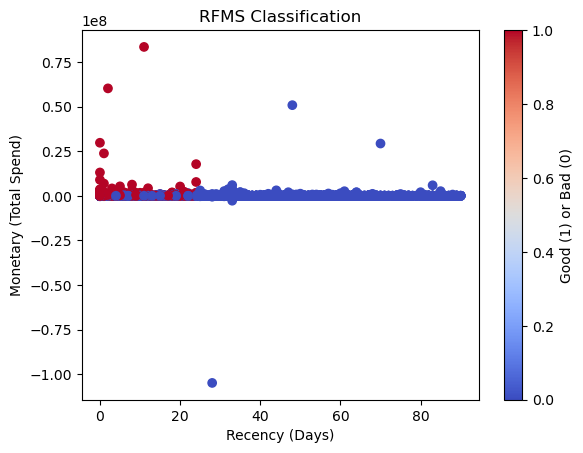

In [4476]:
plt.scatter(rfms['Recency'], rfms['Monetary'], c=rfms['Label'].apply(lambda x: 1 if x == 'Good' else 0), cmap='coolwarm')
plt.xlabel('Recency (Days)')
plt.ylabel('Monetary (Total Spend)')
plt.title('RFMS Classification')
plt.colorbar(label='Good (1) or Bad (0)')
plt.show()


# Weight of Evidence (WoE) Binning


In [4479]:
#a technique used to convert categorical variables into numerical values based on the likelihood of default.

In [4481]:
# create bins for Recency
rfms['Recency_Bin'] = pd.cut(rfms['Recency'], bins=[0, 30, 60, 90, 120, np.inf], labels=False)

# calculate WoE
woe_df = rfms.groupby('Recency_Bin')['Label'].value_counts(normalize=True).unstack().fillna(0)

# calculate WoE
woe_df['WoE'] = np.log(woe_df['Good'] / woe_df['Bad'])


/opt/anaconda3/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [4483]:
(woe_df[['Good', 'Bad', 'WoE']])

Label,Good,Bad,WoE
Recency_Bin,,,
0.0,0.486008,0.513992,-0.055983
1.0,0.000000,1.000000,-inf
2.0,0.000000,1.000000,-inf


# modeling(model selection and training)(Task-4)
model selection and training

# split the data

In [4489]:
# before that we need to merge the encoded data and rfms, retaining " customer id " as common for better model result.

In [4491]:
encoded_data

,CountryCode,Amount,Value,PricingStrategy,FraudResult,Transaction_Hour,Transaction_Day,Transaction_Month,Transaction_Year,Transaction_Day_of_Week,...,ProductCategory_financial_services,ProductCategory_movies,ProductCategory_other,ProductCategory_ticket,ProductCategory_transport,ProductCategory_tv,ProductCategory_utility_bill,ChannelId_ChannelId_2,ChannelId_ChannelId_3,ChannelId_ChannelId_5
0,0.0,0.092004,0.000101,0.5,0.0,0.086957,0.466667,0.909091,0.0,0.500000,...,False,False,False,False,False,False,False,False,True,False
1,0.0,0.091910,0.000002,0.5,0.0,0.086957,0.466667,0.909091,0.0,0.500000,...,True,False,False,False,False,False,False,True,False,False
2,0.0,0.091958,0.000050,0.5,0.0,0.086957,0.466667,0.909091,0.0,0.500000,...,False,False,False,False,False,False,False,False,True,False
3,0.0,0.093750,0.002206,0.5,0.0,0.130435,0.466667,0.909091,0.0,0.500000,...,False,False,False,False,False,False,True,False,True,False
4,0.0,0.091853,0.000065,0.5,0.0,0.130435,0.466667,0.909091,0.0,0.500000,...,True,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95657,0.0,0.091820,0.000101,0.5,0.0,0.391304,0.400000,0.090909,1.0,0.333333,...,True,False,False,False,False,False,False,True,False,False
95658,0.0,0.092004,0.000101,0.5,0.0,0.391304,0.400000,0.090909,1.0,0.333333,...,False,False,False,False,False,False,False,False,True,False
95659,0.0,0.091910,0.000002,0.5,0.0,0.391304,0.400000,0.090909,1.0,0.333333,...,True,False,False,False,False,False,False,True,False,False
95660,0.0,0.092188,0.000303,0.5,0.0,0.434783,0.400000,0.090909,1.0,0.333333,...,False,False,False,False,False,True,False,False,True,False


In [4493]:
rfms

,CustomerId,Recency,Frequency,Monetary,Label,Recency_Bin
0,CustomerId_1,83,1,-10000.0,Bad,2.0
1,CustomerId_10,83,1,-10000.0,Bad,2.0
2,CustomerId_1001,89,5,20000.0,Bad,2.0
3,CustomerId_1002,25,11,4225.0,Bad,0.0
4,CustomerId_1003,11,6,20000.0,Bad,0.0
...,...,...,...,...,...,...
3737,CustomerId_992,4,6,20000.0,Bad,0.0
3738,CustomerId_993,25,5,20000.0,Bad,0.0
3739,CustomerId_994,0,101,543873.0,Good,NaN
3740,CustomerId_996,67,17,139000.0,Bad,2.0


In [4495]:
rfms.columns

Index(['CustomerId', 'Recency', 'Frequency', 'Monetary', 'Label',
       'Recency_Bin'],
      dtype='object')

In [4497]:
encoded_data.columns

Index(['CountryCode', 'Amount', 'Value', 'PricingStrategy', 'FraudResult',
       'Transaction_Hour', 'Transaction_Day', 'Transaction_Month',
       'Transaction_Year', 'Transaction_Day_of_Week', 'Is_Weekend',
       'Transaction_Quarter', 'TransactionCount', 'CustomerId',
       'ProviderId_ProviderId_2', 'ProviderId_ProviderId_3',
       'ProviderId_ProviderId_4', 'ProviderId_ProviderId_5',
       'ProviderId_ProviderId_6', 'ProductId_ProductId_10',
       'ProductId_ProductId_11', 'ProductId_ProductId_12',
       'ProductId_ProductId_13', 'ProductId_ProductId_14',
       'ProductId_ProductId_15', 'ProductId_ProductId_16',
       'ProductId_ProductId_19', 'ProductId_ProductId_2',
       'ProductId_ProductId_20', 'ProductId_ProductId_21',
       'ProductId_ProductId_22', 'ProductId_ProductId_23',
       'ProductId_ProductId_24', 'ProductId_ProductId_27',
       'ProductId_ProductId_3', 'ProductId_ProductId_4',
       'ProductId_ProductId_5', 'ProductId_ProductId_6',
       'ProductId_

In [4499]:
#aggregate the Encoded Data

In [4501]:
# group by CustomerId and aggregate
aggregated_encoded = encoded_data.groupby('CustomerId').agg({
    'Amount': 'sum',           # Keep as float for amounts
    'Value': 'sum',            # Assuming you want the total of Value as well, adjust as needed
    'TransactionCount': 'count' # This should also be an int64
}).reset_index()


In [4503]:
aggregated_encoded

,CustomerId,Amount,Value,TransactionCount
0,CustomerId_1,0.090993,0.001012,1
1,CustomerId_10,0.090993,0.001012,1
2,CustomerId_1001,0.461397,0.003076,5
3,CustomerId_1002,1.011418,0.000481,11
4,CustomerId_1003,0.553309,0.003238,6
...,...,...,...,...
3737,CustomerId_992,0.553309,0.003238,6
3738,CustomerId_993,0.461397,0.003238,5
3739,CustomerId_994,9.333077,0.062133,101
3740,CustomerId_996,1.575276,0.015280,17


In [4505]:
aggregated_encoded['Amount'] = aggregated_encoded['Amount'].round(2)

In [4507]:
aggregated_encoded

,CustomerId,Amount,Value,TransactionCount
0,CustomerId_1,0.09,0.001012,1
1,CustomerId_10,0.09,0.001012,1
2,CustomerId_1001,0.46,0.003076,5
3,CustomerId_1002,1.01,0.000481,11
4,CustomerId_1003,0.55,0.003238,6
...,...,...,...,...
3737,CustomerId_992,0.55,0.003238,6
3738,CustomerId_993,0.46,0.003238,5
3739,CustomerId_994,9.33,0.062133,101
3740,CustomerId_996,1.58,0.015280,17


In [4509]:
# check data types
print(aggregated_encoded.dtypes)

# ensure Amount is float and Value is int64
aggregated_encoded['Amount'] = aggregated_encoded['Amount'].astype(float)
aggregated_encoded['Value'] = aggregated_encoded['Value'].astype('int64')


CustomerId           object
Amount              float64
Value               float64
TransactionCount      int64
dtype: object


In [4511]:
# merging the DataFrames on 'CustomerId'
merged_encoded = pd.merge(aggregated_encoded, rfms, on='CustomerId', how='left')  # Use 'inner', 'outer', or 'left' as needed

In [4513]:
merged_encoded

,CustomerId,Amount,Value,TransactionCount,Recency,Frequency,Monetary,Label,Recency_Bin
0,CustomerId_1,0.09,0,1,83,1,-10000.0,Bad,2.0
1,CustomerId_10,0.09,0,1,83,1,-10000.0,Bad,2.0
2,CustomerId_1001,0.46,0,5,89,5,20000.0,Bad,2.0
3,CustomerId_1002,1.01,0,11,25,11,4225.0,Bad,0.0
4,CustomerId_1003,0.55,0,6,11,6,20000.0,Bad,0.0
...,...,...,...,...,...,...,...,...,...
3737,CustomerId_992,0.55,0,6,4,6,20000.0,Bad,0.0
3738,CustomerId_993,0.46,0,5,25,5,20000.0,Bad,0.0
3739,CustomerId_994,9.33,0,101,0,101,543873.0,Good,NaN
3740,CustomerId_996,1.58,0,17,67,17,139000.0,Bad,2.0


In [4515]:
merged_encoded.isna().sum()

CustomerId            0
Amount                0
Value                 0
TransactionCount      0
Recency               0
Frequency             0
Monetary              0
Label                 0
Recency_Bin         333
dtype: int64

In [4517]:
# calculate mean, excluding NA values
mean_recency = merged_encoded['Recency_Bin'].mean()

# fill NA values with the mean
merged_encoded['Recency_Bin'].fillna(mean_recency, inplace=True)


/var/folders/y3/bgq7_1ts2x50tvcr_691gg480000gn/T/ipykernel_70618/3238318981.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_encoded['Recency_Bin'].fillna(mean_recency, inplace=True)


In [4519]:
merged_encoded.isna().sum()

CustomerId          0
Amount              0
Value               0
TransactionCount    0
Recency             0
Frequency           0
Monetary            0
Label               0
Recency_Bin         0
dtype: int64

In [4521]:
merged_encoded.columns

Index(['CustomerId', 'Amount', 'Value', 'TransactionCount', 'Recency',
       'Frequency', 'Monetary', 'Label', 'Recency_Bin'],
      dtype='object')

In [ ]:
#split the Data
#Splitting the data into training and testing sets helps evaluate the model’s performance on unseen data.

In [4523]:
# features and target variable
X = merged_encoded[['Monetary', 'Recency']]
y = merged_encoded['Label']

In [4525]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4529]:
X_train

,Monetary,Recency
3733,228727.20,5
485,6000.00,51
2172,104000.00,0
3295,20000.00,4
2584,109921.75,0
...,...,...
1130,60000.00,11
1294,173967.50,7
860,50000.00,0
3507,-200000.00,1


In [4531]:
y_train

3733    Good
485      Bad
2172    Good
3295     Bad
2584    Good
        ... 
1130    Good
1294    Good
860     Good
3507     Bad
3174    Good
Name: Label, Length: 2993, dtype: object

In [4535]:
X_test


,Monetary,Recency
3450,135646.0,0
1114,31000.0,0
351,10000.0,5
1983,51740.0,1
2321,5000.0,15
...,...,...
3416,89000.0,20
3389,-50.0,20
612,1509988.0,22
1551,20000.0,19


In [4537]:
y_test

3450    Good
1114     Bad
351      Bad
1983    Good
2321     Bad
        ... 
3416    Good
3389     Bad
612      Bad
1551     Bad
1084     Bad
Name: Label, Length: 749, dtype: object

# Logistic Regression

In [4546]:
# standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [4548]:
# logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)

# predictions
log_predictions = log_model.predict(X_test_scaled)

# evaluation
print("Logistic Regression Classification Report:")
print(classification_report(y_test, log_predictions))
print("Confusion Matrix:")
print(confusion_matrix(y_test, log_predictions))
print("ROC AUC Score:", roc_auc_score(y_test, log_model.predict_proba(X_test_scaled)[:, 1]))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

         Bad       0.87      0.84      0.85       528
        Good       0.64      0.69      0.67       221

    accuracy                           0.80       749
   macro avg       0.75      0.77      0.76       749
weighted avg       0.80      0.80      0.80       749

Confusion Matrix:
[[443  85]
 [ 68 153]]
ROC AUC Score: 0.8971059577677224


# Train and Evaluate Random Forest

In [4551]:
# random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# predictions
rf_predictions = rf_model.predict(X_test)

# Evaluation
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_predictions))
print("Confusion Matrix:")
print(confusion_matrix(y_test, rf_predictions))
print("ROC AUC Score:", roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1]))



Random Forest Classification Report:
              precision    recall  f1-score   support

         Bad       0.99      0.98      0.98       528
        Good       0.95      0.97      0.96       221

    accuracy                           0.97       749
   macro avg       0.97      0.97      0.97       749
weighted avg       0.97      0.97      0.97       749

Confusion Matrix:
[[516  12]
 [  7 214]]
ROC AUC Score: 0.989249108734403


# Hyperparameter Tunning

In [4556]:
# define the model
rf_model = RandomForestClassifier(random_state=42)

In [4560]:
# define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],  # number of trees
    'max_depth': [None, 10, 20, 30],  # maximum depth of trees
    'min_samples_split': [2, 5, 10],  # minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # minimum samples required to be at a leaf node
}

In [4562]:
# initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           scoring='roc_auc', cv=5, verbose=2, n_jobs=-1)

In [4564]:
# fit the grid search to the data
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best parameters from Grid Search:", grid_search.best_params_)
print("Best ROC AUC Score from Grid Search:", grid_search.best_score_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters from Grid Search: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Best ROC AUC Score from Grid Search: 0.9921810103348154


# Hyperparameter Tuning with Random Search

In [4583]:
# define the model
rf_model = RandomForestClassifier(random_state=42)

# define the hyperparameter distribution
param_dist = {
    'n_estimators': randint(50, 200),  # Randomly sample between 50 and 200 trees
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 11),  # Randomly sample between 2 and 10
    'min_samples_leaf': randint(1, 5)  # Randomly sample between 1 and 4
}


In [4582]:
# initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist,
                                   n_iter=100, scoring='roc_auc', cv=5,
                                   verbose=2, random_state=42, n_jobs=-1)

# fit the random search to the data
random_search.fit(X_train, y_train)

# best parameters and score
print("Best parameters from Random Search:", random_search.best_params_)
print("Best ROC AUC Score from Random Search:", random_search.best_score_)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters from Random Search: {'max_depth': 30, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 57}
Best ROC AUC Score from Random Search: 0.992293013245963


# Model Evaluation

In [4606]:
# Encode the labels
le = LabelEncoder()
merged_encoded['Label'] = le.fit_transform(merged_encoded['Label'])  # 'Bad' -> 0, 'Good' -> 1

In [4608]:
# Define features and target
X = merged_encoded[['Monetary', 'Recency']]
y = merged_encoded['Label']

In [4614]:
#already fitted best Random Forest model above
best_rf_model = grid_search.best_estimator_  

# Make predictions on the test set
rf_predictions = best_rf_model.predict(X_test)
rf_proba = best_rf_model.predict_proba(X_test)[:, 1]  # probability of the 'Good' class

# Calculate the metrics using string labels
accuracy = accuracy_score(y_test, rf_predictions)
precision = precision_score(y_test, rf_predictions, pos_label='Good')  # specify 'Good' as positive class
recall = recall_score(y_test, rf_predictions, pos_label='Good')
f1 = f1_score(y_test, rf_predictions, pos_label='Good')
roc_auc = roc_auc_score(y_test, rf_proba)  # roc_auc_score can handle string labels

# Print the results
print("Random Forest Model Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, rf_predictions, target_names=['Bad', 'Good']))

Random Forest Model Performance:
Accuracy: 0.9760
Precision: 0.9394
Recall: 0.9819
F1 Score: 0.9602
ROC AUC: 0.9922

Classification Report:
              precision    recall  f1-score   support

         Bad       0.99      0.97      0.98       528
        Good       0.94      0.98      0.96       221

    accuracy                           0.98       749
   macro avg       0.97      0.98      0.97       749
weighted avg       0.98      0.98      0.98       749

